# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Иерусалимов Никита, вариант 24.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши:

Общий вид задачи Коши: 

$$
\begin{cases}
    f(x, y, y', y'', \dots, y^{(n)}) = 0 \\
    y(x_0) = y_0 \\
    y'(x_0) = y_1 \\
    y''(x_0) = y_2 \\
    \dots \\
    y^{(n-1)}(x_0) = y_{n-1}
\end{cases}
$$

### Метод половинного деления:

Алгоритм, который позволяет найти корень функции. Суть алгоритма заключается в сужении области, где находится корень. Определение, есть ли в области корень происходит за счет сравнения знаков значения функции на концах области: если знаки разные, значит корень существует.

### Краевая задача:
Задача о нахождении решения заданного дифференциального уравнения, удовлетворяющего краевым условиям в концах интервала или на границе области.

## Постановка задачи

Дано дифференциальное уравнение: $y'' = f(x, y), a < x < b$ (1) и граничные условия.

$$y(a) = y_a, y(b) = y_b (2)$$ 

Требуется найти решение задачи (1)-(2) и построить его график. Рассмотрим задачу Коши для уравнения (1) с начальными условиями.

$$y(a) = y_a, y'(a) = h (3)$$

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $x = b$ является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$$y(b, h) = y_b (4)$$

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного
деления.





## Схема решения

1. Задаем наугад число $h_0$, решаем задачу Коши. Далее вычисляем $y(b, h_0)$.
Если оказалось, что $y(b, h_0) = y_b$, то мы решили краевую задачу. Если же нет, то переходим на следующий шаг.


2. Пусть, например, $y(b, h_0) > y_b$. Выберем шаг $\Delta{h}$ и решаем несколько раз задачу Коши при $h_1 = h_0 + \Delta{h}$.
Если снова получили $y(b, h_1) > y_b$, причём $y(b, h_0) > y(b, h_1) > y_b$, решаем задачу Коши при $h_2 = h_1 + \Delta{h}$ и т.д.
Процесс повторяется пока не получим неравенство $y(b, h_m) < y_b$.
Это означает, что искомое значение попало в «вилку», т.е. $h \in (h_{m−1}; h_m)$.
Шаг $\Delta{h}$ не должен быть слишком маленьким, иначе процесс сильно затянется.
Знак шага также не известен заранее, может оказаться, что нужно не увеличивать наклон, а уменьшать.


3. Далее применяется стандартный процесс половинного деления к уравнению (4).


4. Процесс останавливаем, когда выполнится неравенство $|y(b, h_m) − y(b, h_{m−1})| < 0.001$.


5. Возможен случай, когда ни одна интегральная кривая не проходит через точку $(b, y_b)$, т.е. задача не имеет решения.
Поэтому нужно ограничить число шагов. Процесс останавливается при $m > M$, где $M$ – заданное число (например, 100).  







## Выполнение работы

In [19]:
from scipy import integrate
from matplotlib.pyplot import grid,legend, plot, xlabel
from numpy import linspace
import math


a = 0
b = 2
y_a = 1
y_b = 2
h = 1 # шаг
X = linspace(a, b, 250) # Берем равномерное распределение чисел за указанный интервал
steps = 1000 # допустимое количество щагов

def func(x: float, y: float):
    return math.cos(x*y)

def solve_func(x, values):
    return values[1], func(x,values[0])

def integrateFunc(h):
    results = integrate.solve_ivp(solve_func, [a, b], [y_a, h], t_eval=X)
    return results.y[0][-1]

y_bh = integrateFunc(h)

if y_bh != y_b:
    print("y(b,h) != y_b")
    print("y({},{}) = {} > y_b = {}".format(b,h,y_bh,y_b))
    for step in range(steps):
        if y_bh > y_b:
            h_right = h
            h -= 1
            h_left = h

            y_bh = integrateFunc(h)
        else:
            break

    print("h = [{},{}]".format(h_left,h_right))

    res_left = integrateFunc(h_left)
    res_right = integrateFunc(h_right)

    for step in range(steps):
        if abs(res_left - res_right) > 0.001:
            h_mid = h_left + abs(h_right - h_left) / 2

            res_mid = integrateFunc(h_mid)
            #print(h_mid, res_mid)
            y_bh = res_mid
            y_bh_left = res_left

            if (y_bh_left - y_b) * (y_bh - y_b) < 0:
                h_right = h_mid
                res_right = res_mid
            else:
                h_left = h_mid
                res_left = res_mid

        else:
            break

    print("h = {}: f(b, h) = {}".format(h_left, res_right))
else:
    print("Повезло, краевая задача решена.\ny(b,h) = y_b\ny({},{}) = {}".format(b,h,y_bh))

y(b,h) != y_b
y(2,1) = 3.60948088877028 > y_b = 2
h = [0,1]
h = 0.048828125: f(b, h) = 2.0003739155722653


Таблица с промежуточным результатом работы 

| h             | y                  | 
|---------------|--------------------|
| 0.5           | 2.67690914|
|0.25           | 2.27979213|
|0.125          | 2.10178581|
|0.0625         | 2.01771152|
|0.03125        | 1.97672426|
|0.046875       | 1.99717763|
|0.0546875      | 2.00742143|
|0.05078125     | 2.00229381|
|0.048828125    | 1.99973430|
|0.0498046875   | 2.00101370 |
|0.04931640625  | 2.00037391|
______________________________________

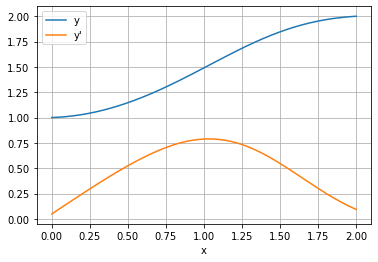

In [16]:
dots = integrate.solve_ivp(solve_func, [a, b], [y_a, h_left], t_eval=X)

plot(X, dots.y[0], label="y")
plot(X, dots.y[1], label="y'")
xlabel("x")
grid(True)
legend()

## Выводы

В ходе практической работы была решена краевая задача для уравнения 2-ого порядка с использованием методов численного интегрирования с определенной точностью. Задача Коши решалась численным интегрированием, а краевая задача с использованием метода половинного деления для поиска начального состояния уравнения.